In [277]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.impute import SimpleImputer

In [278]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [279]:
data_dir = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/'

In [280]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5_cnn_7_7_without_spurs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [281]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,v10_39,v10_40,v10_41,v10_42,v10_43,v10_44,v10_45,v10_46,v10_47,v10_48
0,-0.471330,-0.491060,305.754999,2474.635668,1020.716442,1021.933490,7.544871,7.573249,86.995651,86.370866,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-2.0
1,-0.475564,-0.449940,307.254996,2474.889222,1020.817918,1022.035489,7.659189,7.674586,88.812752,88.320818,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
2,-0.495962,-0.416798,307.874998,2475.312516,1020.667723,1021.885501,7.647250,7.656649,89.104602,88.618993,...,-6.0,-2.0,-1.0,-9.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
3,-0.482776,-0.427451,308.470000,2475.164880,1020.611555,1021.829504,7.615004,7.629676,89.086951,88.597114,...,-3.0,-1.0,-1.0,-9.0,-9.0,-9.0,-7.0,-2.0,-1.0,-1.0
4,-0.224670,-0.402138,304.935001,2473.329226,1019.985987,1021.202496,7.981998,8.007237,92.821251,92.494518,...,-1.0,-1.0,-1.0,-8.0,-8.0,-8.0,-6.0,-2.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,-0.120886,-0.205319,330.230000,2481.329336,1015.473704,1016.707986,5.542659,5.581667,90.589849,90.521463,...,0.0,-1.0,-1.0,-4.0,-4.0,-3.0,-3.0,-3.0,-4.0,-4.0
8113,-0.135043,-0.212356,325.810001,2482.154959,1016.258730,1017.502997,4.446443,4.498458,83.074749,82.783827,...,-5.0,-5.0,-5.0,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0
8114,-0.184694,-0.085406,326.299998,2482.132121,1016.589339,1017.833002,4.451336,4.505584,81.943449,81.599753,...,-4.0,-4.0,-5.0,-3.0,-4.0,-4.0,-4.0,-5.0,-5.0,-5.0
8115,-0.000651,-0.231066,212.345000,2482.411651,1030.922939,1032.223492,1.852644,2.094365,68.787000,65.156515,...,-13.0,-13.0,-13.0,-11.0,-12.0,-12.0,-13.0,-13.0,-13.0,-14.0


In [282]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,v10_39,v10_40,v10_41,v10_42,v10_43,v10_44,v10_45,v10_46,v10_47,v10_48
0,-0.471330,-0.491060,305.754999,2474.635668,1020.716442,1021.933490,7.544871,7.573249,86.995651,86.370866,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-2.0
1,-0.475564,-0.449940,307.254996,2474.889222,1020.817918,1022.035489,7.659189,7.674586,88.812752,88.320818,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
2,-0.495962,-0.416798,307.874998,2475.312516,1020.667723,1021.885501,7.647250,7.656649,89.104602,88.618993,...,-6.0,-2.0,-1.0,-9.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
3,-0.482776,-0.427451,308.470000,2475.164880,1020.611555,1021.829504,7.615004,7.629676,89.086951,88.597114,...,-3.0,-1.0,-1.0,-9.0,-9.0,-9.0,-7.0,-2.0,-1.0,-1.0
4,-0.224670,-0.402138,304.935001,2473.329226,1019.985987,1021.202496,7.981998,8.007237,92.821251,92.494518,...,-1.0,-1.0,-1.0,-8.0,-8.0,-8.0,-6.0,-2.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,-0.120886,-0.205319,330.230000,2481.329336,1015.473704,1016.707986,5.542659,5.581667,90.589849,90.521463,...,0.0,-1.0,-1.0,-4.0,-4.0,-3.0,-3.0,-3.0,-4.0,-4.0
8113,-0.135043,-0.212356,325.810001,2482.154959,1016.258730,1017.502997,4.446443,4.498458,83.074749,82.783827,...,-5.0,-5.0,-5.0,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0
8114,-0.184694,-0.085406,326.299998,2482.132121,1016.589339,1017.833002,4.451336,4.505584,81.943449,81.599753,...,-4.0,-4.0,-5.0,-3.0,-4.0,-4.0,-4.0,-5.0,-5.0,-5.0
8115,-0.000651,-0.231066,212.345000,2482.411651,1030.922939,1032.223492,1.852644,2.094365,68.787000,65.156515,...,-13.0,-13.0,-13.0,-11.0,-12.0,-12.0,-13.0,-13.0,-13.0,-14.0


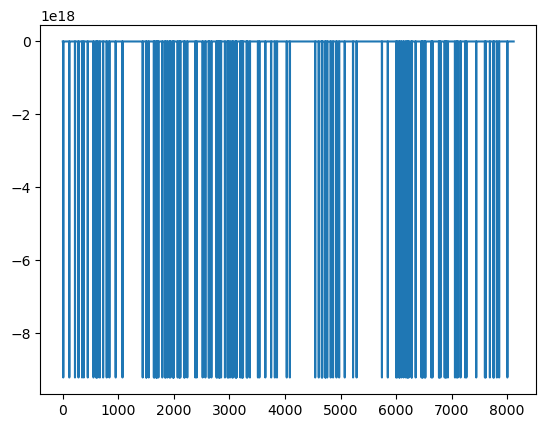

In [283]:
plt.plot(df['sigma0_trip_fore_30'])

In [284]:
df = df.replace(-9.223372036854776e+18, np.nan)
df = df.replace(-2147.0, np.nan)



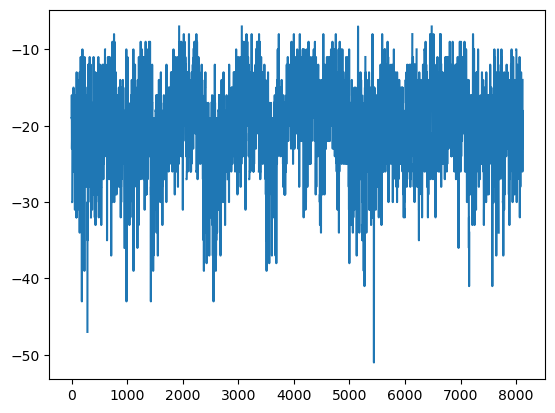

In [285]:
plt.plot(df['sigma0_trip_fore_30'])

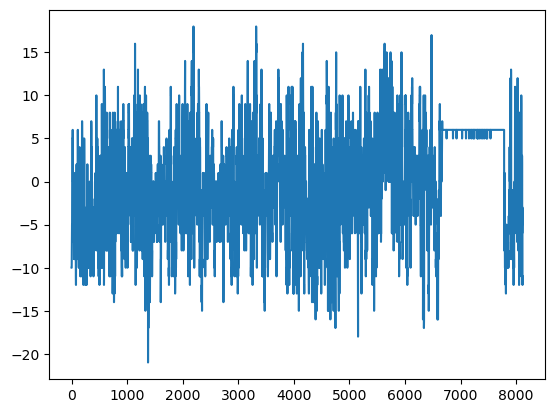

In [286]:
plt.plot(df['v10_30'])

In [287]:
nx=7#17
ny=7#17

In [288]:
num_pixels = nx*ny

In [289]:
list_num_pixels = list(range(num_pixels))

list_of_params_extended = [
        'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
        'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
        'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
        #'start_sensing_time','stop_sensing_time',
        'lats_cropped_image', 'lons_cropped_image',
        'u10', 'v10'
    ]

dict_of_column_names = {}
new_columns = []
for param in list_of_params_extended:
    columns = [param + '_' + str(n) for n in list_num_pixels]
    dict_of_column_names[param] = columns
    new_columns = new_columns + columns
    
predictor_variables = new_columns

In [290]:
sigma0_vars = dict_of_column_names['sigma0_trip_fore'] + dict_of_column_names['sigma0_trip_mid'] + dict_of_column_names['sigma0_trip_aft']

In [15]:
df = df.dropna(subset=['UWr', 'rhoair'] + sigma0_vars)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,v10_39,v10_40,v10_41,v10_42,v10_43,v10_44,v10_45,v10_46,v10_47,v10_48
0,-0.471330,-0.491060,305.754999,2474.635668,1020.716442,1021.933490,7.544871,7.573249,86.995651,86.370866,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-2.0
1,-0.475564,-0.449940,307.254996,2474.889222,1020.817918,1022.035489,7.659189,7.674586,88.812752,88.320818,...,-6.0,-3.0,-1.0,-10.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
2,-0.495962,-0.416798,307.874998,2475.312516,1020.667723,1021.885501,7.647250,7.656649,89.104602,88.618993,...,-6.0,-2.0,-1.0,-9.0,-10.0,-10.0,-8.0,-5.0,-2.0,-1.0
3,-0.482776,-0.427451,308.470000,2475.164880,1020.611555,1021.829504,7.615004,7.629676,89.086951,88.597114,...,-3.0,-1.0,-1.0,-9.0,-9.0,-9.0,-7.0,-2.0,-1.0,-1.0
6,-0.283658,-0.735224,356.614999,2474.383095,1017.670514,1018.886499,7.106518,7.177377,85.171251,84.331696,...,-3.0,-2.0,-1.0,-7.0,-7.0,-6.0,-4.0,-3.0,-2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,-0.030999,-0.055034,301.905005,2483.266861,1028.338851,1029.626501,2.545638,2.643711,75.128500,73.550027,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0
8103,-0.065856,-0.139462,301.880002,2483.165844,1028.308209,1029.595007,2.537448,2.641438,74.126949,72.500254,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0
8104,-0.065835,-0.202534,302.735001,2483.109734,1026.631289,1027.916498,2.634754,2.740547,77.475850,75.857943,...,-5.0,-6.0,-6.0,-5.0,-5.0,-5.0,-5.0,-5.0,-6.0,-6.0
8107,-0.219808,0.016286,263.200002,2481.270003,1016.120909,1017.365500,3.401803,3.546097,65.284349,63.452167,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


In [16]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,v10_39,v10_40,v10_41,v10_42,v10_43,v10_44,v10_45,v10_46,v10_47,v10_48
4376,0.439162,-0.153679,328.029999,2485.153906,993.436312,994.643994,5.623414,5.641269,87.916589,87.620310,...,-8.0,-8.0,-8.0,-9.0,-9.0,-9.0,-8.0,-8.0,-8.0,-8.0
2813,-0.003196,-0.169580,329.650003,2476.298822,1000.624197,1001.828009,6.430701,6.487152,83.523251,83.013206,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-9.0,-9.0
894,-0.240768,0.089830,361.280000,2465.545804,1012.467240,1013.677005,7.589144,7.703877,92.188849,92.010665,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
538,-0.155449,0.207755,358.905003,2465.248335,1015.386609,1016.596500,6.523267,6.630709,74.662099,74.019800,...,-3.0,-3.0,-3.0,-7.0,-6.0,-6.0,-5.0,-2.0,-1.0,0.0
1858,0.009946,-0.040725,309.084998,2480.910790,990.348148,991.556503,4.249706,4.304808,70.085550,69.528546,...,0.0,1.0,2.0,-3.0,-2.0,-1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.009946,-0.040725,218.099999,2488.321281,985.413166,986.633493,2.274638,2.398086,50.732200,48.567153,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
3487,0.009946,-0.040725,253.175002,2488.838337,1018.975889,1020.225497,4.720593,4.747780,88.104300,87.775375,...,-5.0,-5.0,-6.0,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0
3074,0.009946,-0.040725,296.469997,2486.865246,996.945969,998.168002,3.687254,3.772679,67.182150,65.906289,...,-1.0,-1.0,-2.0,-3.0,-2.0,-2.0,-1.0,-1.0,-1.0,-1.0
5366,-0.247201,0.063991,395.650002,2458.495273,1016.496605,1017.669507,14.120859,13.920874,93.747450,93.383672,...,8.0,8.0,8.0,6.0,6.0,7.0,7.0,8.0,8.0,8.0


In [17]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

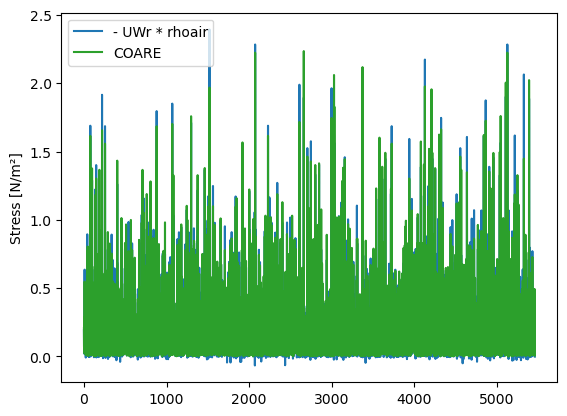

In [18]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [19]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

predictor_variables = ['s0', 'inc', 'az']

In [20]:
df[predictor_variables]

,sigma0_trip_fore_0,sigma0_trip_fore_1,sigma0_trip_fore_2,sigma0_trip_fore_3,sigma0_trip_fore_4,sigma0_trip_fore_5,sigma0_trip_fore_6,sigma0_trip_fore_7,sigma0_trip_fore_8,sigma0_trip_fore_9,...,v10_39,v10_40,v10_41,v10_42,v10_43,v10_44,v10_45,v10_46,v10_47,v10_48
4376,-11.0,-11.0,-11.0,-12.0,-13.0,-13.0,-14.0,-11.0,-11.0,-11.0,...,-8.0,-8.0,-8.0,-9.0,-9.0,-9.0,-8.0,-8.0,-8.0,-8.0
2813,-23.0,-23.0,-24.0,-25.0,-25.0,-23.0,-22.0,-23.0,-23.0,-23.0,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-9.0,-9.0
894,-22.0,-22.0,-22.0,-21.0,-20.0,-18.0,-18.0,-22.0,-22.0,-20.0,...,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0,-8.0
538,-18.0,-21.0,-24.0,-23.0,-21.0,-20.0,-35.0,-20.0,-24.0,-23.0,...,-3.0,-3.0,-3.0,-7.0,-6.0,-6.0,-5.0,-2.0,-1.0,0.0
1858,-13.0,-13.0,-13.0,-13.0,-13.0,-13.0,-13.0,-13.0,-14.0,-13.0,...,0.0,1.0,2.0,-3.0,-2.0,-1.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,-15.0,-14.0,-14.0,-14.0,-13.0,-13.0,-12.0,-13.0,-13.0,-13.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
3487,-22.0,-21.0,-19.0,-18.0,-18.0,-18.0,-18.0,-21.0,-21.0,-21.0,...,-5.0,-5.0,-6.0,-4.0,-4.0,-5.0,-5.0,-5.0,-6.0,-6.0
3074,-10.0,-9.0,-9.0,-9.0,-10.0,-11.0,-13.0,-11.0,-10.0,-9.0,...,-1.0,-1.0,-2.0,-3.0,-2.0,-2.0,-1.0,-1.0,-1.0,-1.0
5366,-20.0,-20.0,-20.0,-20.0,-21.0,-22.0,-21.0,-19.0,-20.0,-20.0,...,8.0,8.0,8.0,6.0,6.0,7.0,7.0,8.0,8.0,8.0


In [21]:
imp_mean = SimpleImputer(missing_values=9999, strategy='most_frequent')

In [22]:
x = imp_mean.fit_transform(df[predictor_variables])
x

array([[-11., -11., -11., ...,  -8.,  -8.,  -8.],
       [-23., -23., -24., ...,  -8.,  -9.,  -9.],
       [-22., -22., -22., ...,  -8.,  -8.,  -8.],
       ...,
       [-10.,  -9.,  -9., ...,  -1.,  -1.,  -1.],
       [-20., -20., -20., ...,   8.,   8.,   8.],
       [-25., -30., -25., ...,  -1.,   0.,  -1.]])

In [23]:
x[0, 0]

-11.0

In [24]:
imp_mean = SimpleImputer(missing_values=-9.22337204e+18, strategy='constant')

In [25]:
x = imp_mean.fit_transform(x)
x

array([[-11., -11., -11., ...,  -8.,  -8.,  -8.],
       [-23., -23., -24., ...,  -8.,  -9.,  -9.],
       [-22., -22., -22., ...,  -8.,  -8.,  -8.],
       ...,
       [-10.,  -9.,  -9., ...,  -1.,  -1.,  -1.],
       [-20., -20., -20., ...,   8.,   8.,   8.],
       [-25., -30., -25., ...,  -1.,   0.,  -1.]])

x = df[predictor_variables]
x

In [26]:
x.shape

(5459, 553)

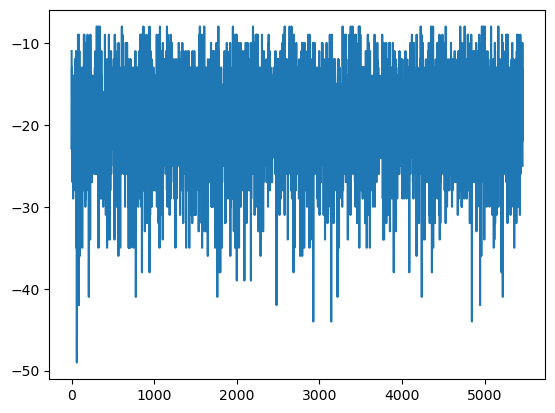

In [27]:
plt.plot(x[:, 0])

In [28]:
y = - df['UWr'] * df['rhoair']
y

4376    0.191722
2813    0.078849
894     0.160323
538     0.037349
1858    0.022105
          ...   
2034    0.470551
3487    0.086792
3074    0.238660
5366    0.045702
949    -0.001692
Length: 5459, dtype: float64

In [29]:
y.isnull().values.sum()

0

# COARE

In [30]:
c = df['stress']

In [31]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [32]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [33]:
c_train = c[:split_idx]
c_test = c[split_idx:]

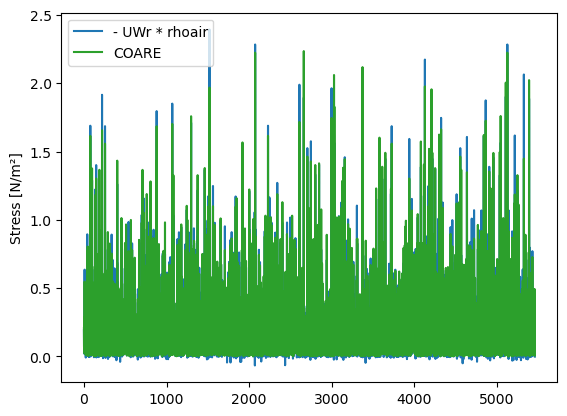

In [34]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [35]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [36]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [37]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [38]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-06-20 12:02:51.451233: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-20 12:02:51.452316: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-20 12:02:51.452326: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-20 12:02:51.452351: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-6l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-20 12:02:51.452519: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

13/13 [==============================] - 1s 32ms/step - loss: 1.3140 - mean_absolute_error: 0.8755 - val_loss: 0.9712 - val_mean_absolute_error: 0.7456
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.7427 - mean_absolute_error: 0.6546 - val_loss: 0.7202 - val_mean_absolute_error: 0.5999
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5555 - mean_absolute_error: 0.5366 - val_loss: 0.6274 - val_mean_absolute_error: 0.5798
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.7110 - mean_absolute_error: 0.5784 - val_loss: 0.5717 - val_mean_absolute_error: 0.5300
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6448 - mean_absolute_error: 0.5455 - val_loss: 0.5561 - val_mean_absolute_error: 0.5327
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4936 - mean_absolute_error: 0.4975 - val_loss: 0.5087 - val_mean_absolute_error: 0.5116
Epoch 7/500
13/13 [==============

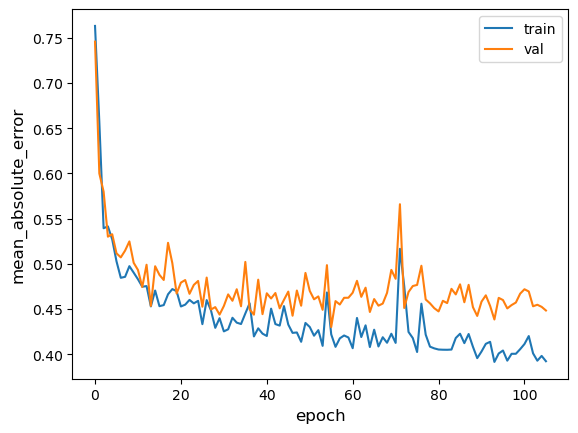

154/154 [==============================] - 0s 349us/step - loss: 0.5606 - mean_absolute_error: 0.4948
Test accuracy 0.4948372542858124
Test loss 0.5605863928794861


In [39]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [40]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [41]:
np.mean(y_test)

0.1892654813197334

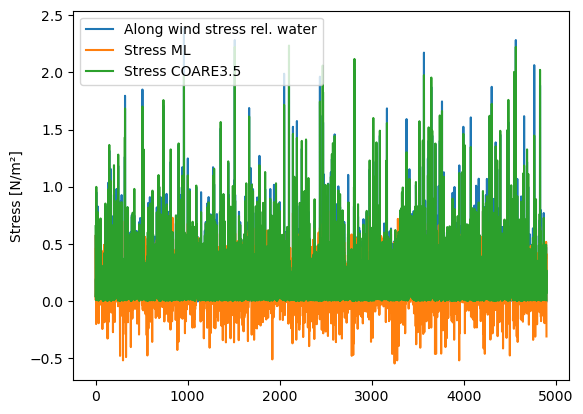

In [42]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

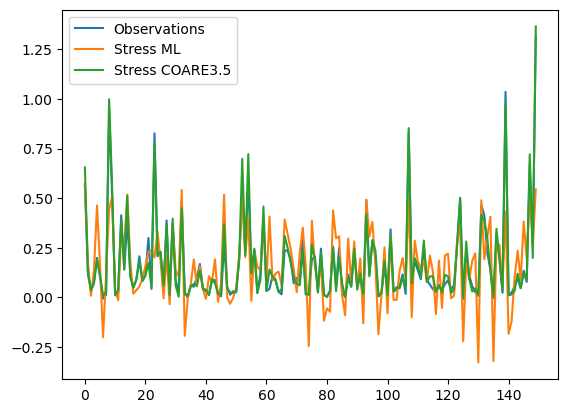

In [43]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [44]:
rmse(y_test.values, y_test_pred)

0.3251382848445281

In [45]:
rmse(y_test.values, c_test)

0.05126996932539711

Text(0, 0.5, 'Stress ML [N/m²]')

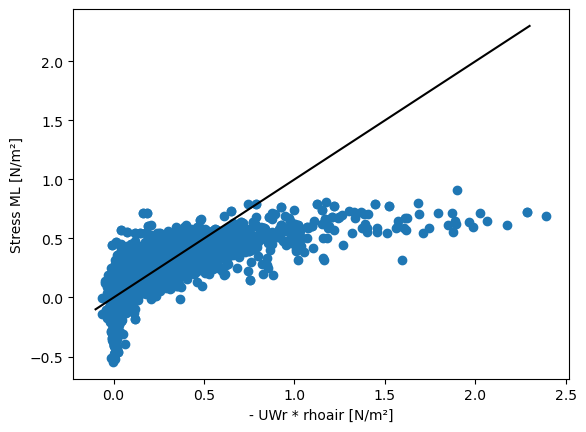

In [46]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

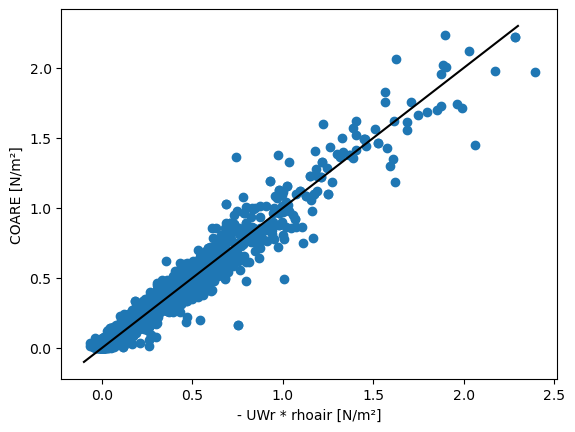

In [47]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

## Correlation

In [48]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.70934551],
       [0.70934551, 1.        ]])

In [49]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

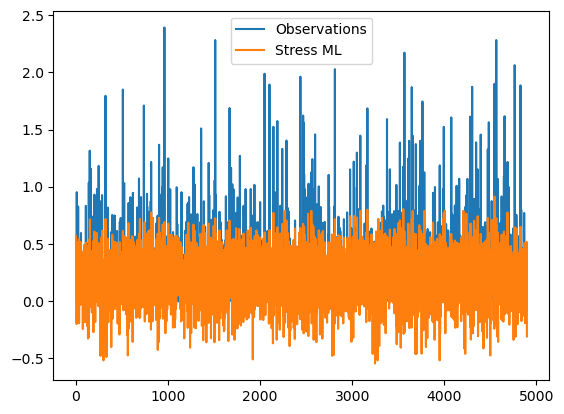

In [50]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [51]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.70934551],
       [0.70934551, 1.        ]])

In [52]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [53]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.3251382848445281

# Other experiments

In [54]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [55]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [56]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 1.8861 - mean_absolute_error: 1.0212 - val_loss: 2.5166 - val_mean_absolute_error: 1.3744
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1172 - mean_absolute_error: 0.7337 - val_loss: 2.0249 - val_mean_absolute_error: 1.2239
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0054 - mean_absolute_error: 0.6449 - val_loss: 1.4636 - val_mean_absolute_error: 1.0357
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8427 - mean_absolute_error: 0.6230 - val_loss: 1.0623 - val_mean_absolute_error: 0.8502
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6245 - mean_absolute_error: 0.5413 - val_loss: 0.8153 - val_mean_absolute_error: 0.7404
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5542 - mean_absolute_error: 0.5584 - val_loss: 0.6448 - val_mean_absolute_error: 0.6361
Epoch 7/500
25/25 [===

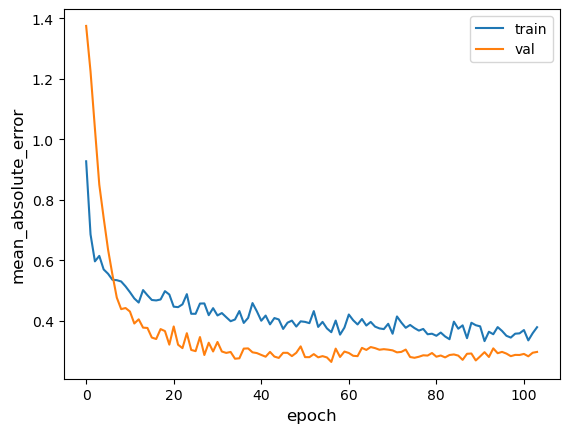

154/154 [==============================] - 0s 330us/step - loss: 0.2933 - mean_absolute_error: 0.3248
Test accuracy 0.32484468817710876
Test loss 0.293265700340271


In [57]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [58]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

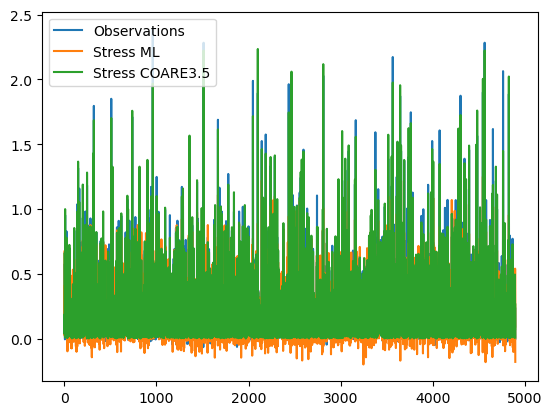

In [59]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [60]:
rmse(y_test.values, y_test_pred)

0.33118989472147403

In [61]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [62]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85858688],
       [0.85858688, 1.        ]])

In [63]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

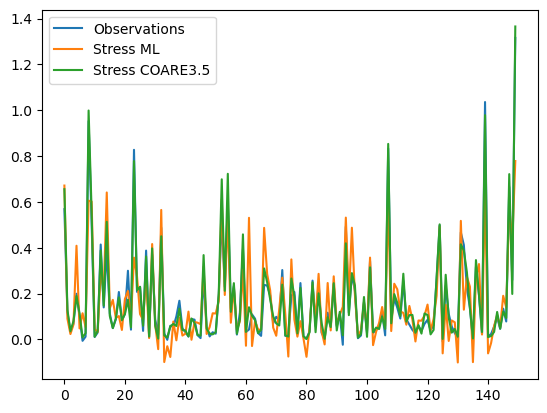

In [64]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [65]:
rmse(y_test.values, y_test_pred)

0.33118989472147403

## Correlation

In [66]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85858688],
       [0.85858688, 1.        ]])

In [67]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [68]:
y_test.values.shape

(4899,)

In [69]:
y_test_pred[:, 0].shape

(4899,)

In [70]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [71]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

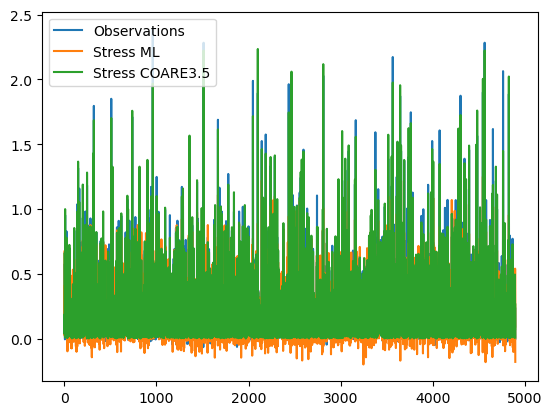

In [72]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

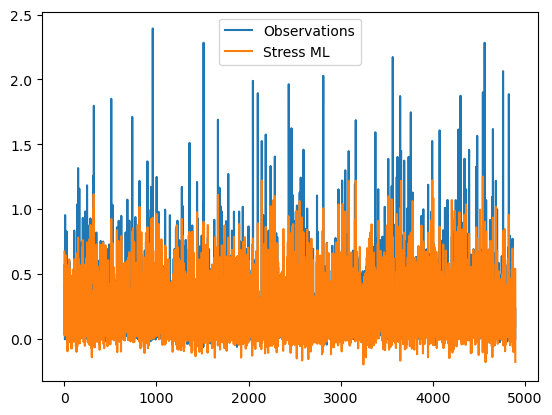

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [74]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [75]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33118989472147403

Text(0, 0.5, 'Stress ML [N/m²]')

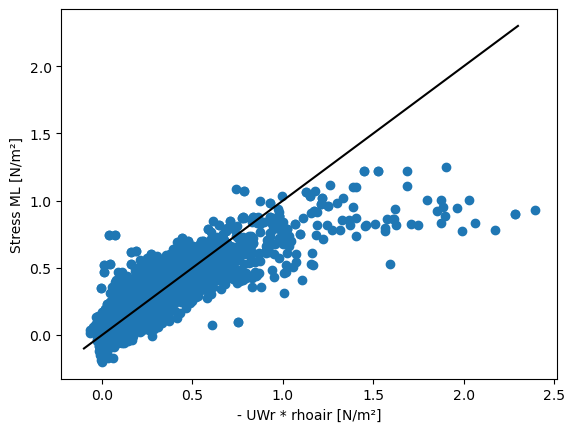

In [76]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [77]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [78]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [79]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 3.0390 - mean_absolute_error: 1.2882 - val_loss: 2.1527 - val_mean_absolute_error: 1.1668
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3108 - mean_absolute_error: 0.8778 - val_loss: 1.6638 - val_mean_absolute_error: 1.0127
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9896 - mean_absolute_error: 0.7322 - val_loss: 0.7796 - val_mean_absolute_error: 0.6806
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.1386 - mean_absolute_error: 0.8006 - val_loss: 0.7402 - val_mean_absolute_error: 0.6412
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0514 - mean_absolute_error: 0.7419 - val_loss: 0.5618 - val_mean_absolute_error: 0.5791
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8639 - mean_absolute_error: 0.6365 - val_loss: 0.4399 - val_mean_absolute_error: 0.4960
Epoch 7/500
25/25 [===

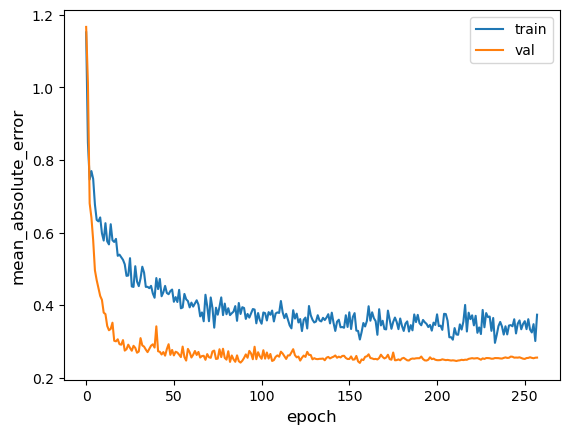

154/154 [==============================] - 0s 421us/step - loss: 0.2381 - mean_absolute_error: 0.2737
Test accuracy 0.27366209030151367
Test loss 0.238083153963089


In [80]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [81]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

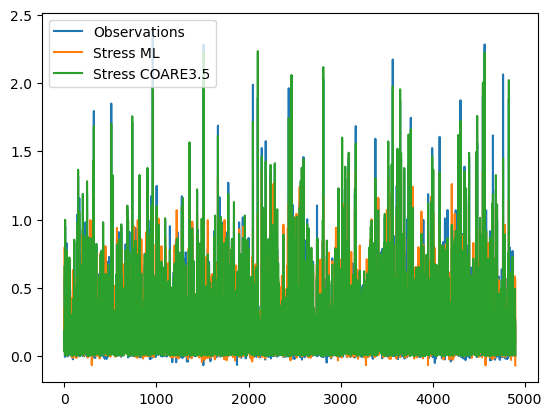

In [82]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [83]:
rmse(y_test.values, y_test_pred)

0.3342778464939667

In [84]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [85]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88731523],
       [0.88731523, 1.        ]])

In [86]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

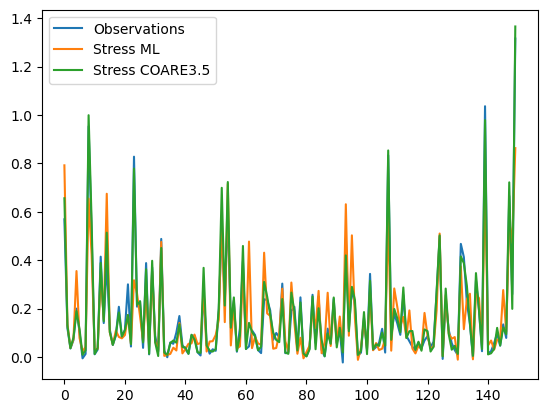

In [87]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [88]:
rmse(y_test.values, y_test_pred)

0.3342778464939667

## Correlation

In [89]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88731523],
       [0.88731523, 1.        ]])

In [90]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [91]:
y_test.values.shape

(4899,)

In [92]:
y_test_pred[:, 0].shape

(4899,)

In [93]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [94]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

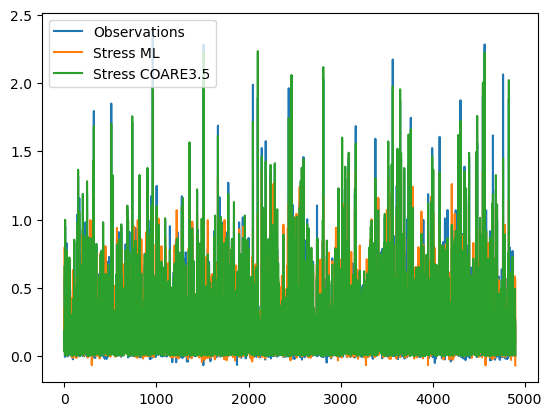

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

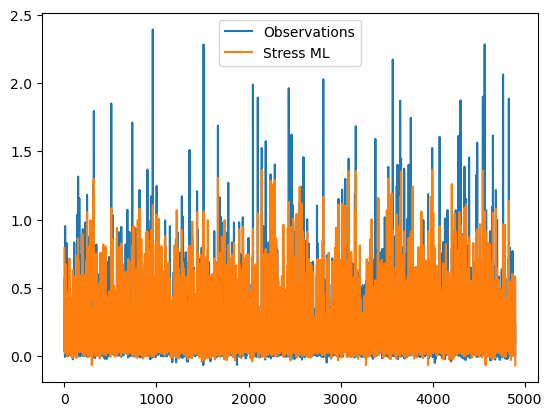

In [96]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [97]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [98]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3342778464939667

Text(0, 0.5, 'Stress ML [N/m²]')

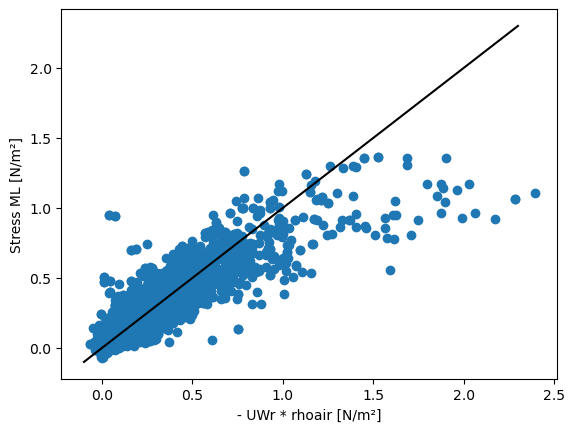

In [99]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 124ms/step - loss: 3.9823 - mean_absolute_error: 1.5506 - val_loss: 0.5195 - val_mean_absolute_error: 0.4693
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 1.6667 - mean_absolute_error: 1.0205 - val_loss: 0.5691 - val_mean_absolute_error: 0.5584
Epoch 3/500
2/2 [==============================] - 0s 26ms/step - loss: 0.9936 - mean_absolute_error: 0.7820 - val_loss: 0.5498 - val_mean_absolute_error: 0.5611
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 0.7206 - mean_absolute_error: 0.6469 - val_loss: 0.4876 - val_mean_absolute_error: 0.5288
Epoch 5/500
2/2 [==============================] - 0s 26ms/step - loss: 0.6999 - mean_absolute_error: 0.6287 - val_loss: 0.4501 - val_mean_absolute_error: 0.5068
Epoch 6/500
2/2 [==============================] - 0s 26ms/step - loss: 0.5493 - mean_absolute_error: 0.5790 - val_loss: 0.4974 - val_mean_absolute_error: 0.5184
Epoch 7/500
2/2 [==========

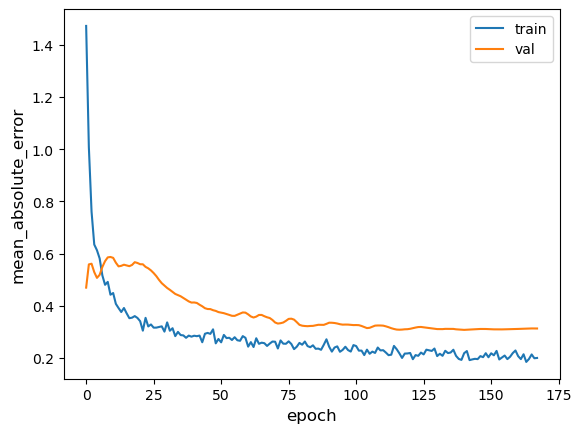

154/154 [==============================] - 0s 600us/step - loss: 0.2934 - mean_absolute_error: 0.3144
Test accuracy 0.3143649399280548
Test loss 0.2934471070766449


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

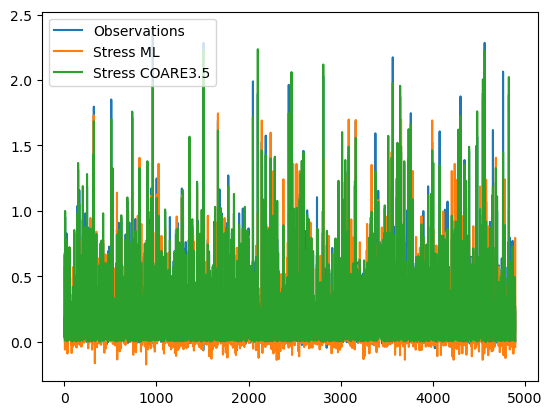

In [105]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [106]:
rmse(y_test.values, y_test_pred)

0.33964586516915235

In [107]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85871686],
       [0.85871686, 1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [110]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85871686],
       [0.85871686, 1.        ]])

In [111]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [112]:
y_test.values.shape

(4899,)

In [113]:
y_test_pred[:, 0].shape

(4899,)

In [114]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [115]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

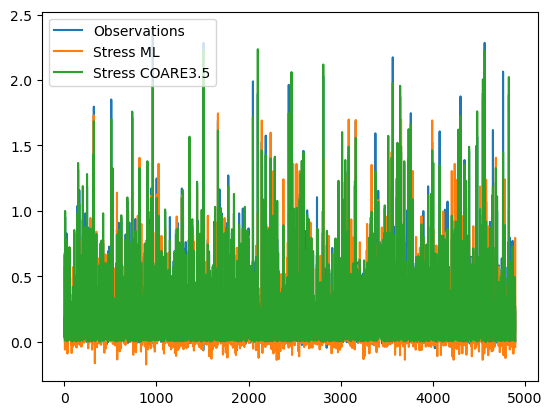

In [116]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

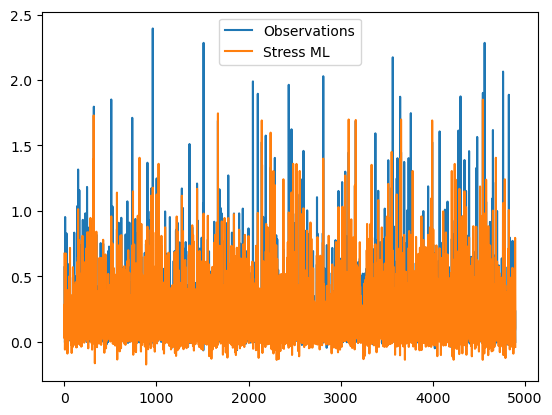

In [117]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [118]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [119]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.33964586516915235

Text(0, 0.5, 'Stress ML [N/m²]')

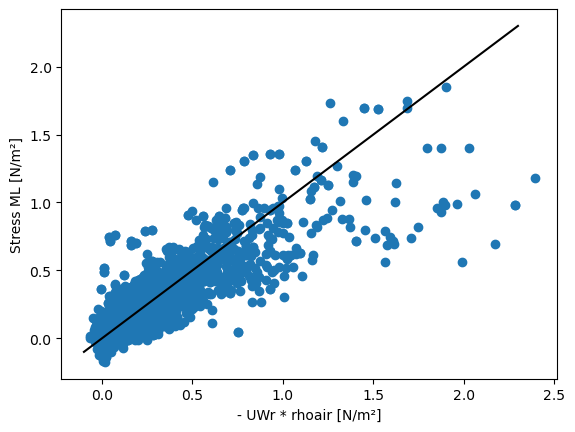

In [120]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# CNN

For the CNN we neew to reshape s0, inc, and az vectors, to matrices of shape (num_records, 12, 10, num_variables).

In [291]:
list_num_pixels = list(range(num_pixels))

list_of_params_extended = [
        'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
        'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
        'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
        #'start_sensing_time','stop_sensing_time',
        #'lats_cropped_image', 'lons_cropped_image',
        'u10', 'v10'
    ]

dict_of_column_names = {}
new_columns = []
for param in list_of_params_extended:
    columns = [param + '_' + str(n) for n in list_num_pixels]
    dict_of_column_names[param] = columns
    new_columns = new_columns + columns
    
predictor_variables = new_columns

In [292]:
dict_param_arrays = {}
for param in list_of_params_extended:
    param_str = dict_of_column_names[param]
    dict_param_arrays[param] = ( df[param_str].values).reshape(df[param_str].shape[0], nx, ny)


In [293]:
x = np.stack([dict_param_arrays[x] for x in dict_param_arrays], 3)
x.shape

(8117, 7, 7, 13)

In [294]:
np.isnan(np.min(y))

False

In [295]:
x_train = x[:split_idx, :, :, :]
x_test = x[split_idx:, :, :, :]

In [296]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [297]:
x_train.shape

(560, 7, 7, 13)

In [298]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

/tmp/ipykernel_887955/2406142404.py:9: RuntimeWarning: invalid value encountered in true_divide
  x_train_norm = (x_train - x_train_mean) / x_train_std
/tmp/ipykernel_887955/2406142404.py:10: RuntimeWarning: invalid value encountered in true_divide
  x_test_norm = (x_test - x_train_mean) / x_train_std


In [299]:
y_train_mean

0.18843322569842566

In [300]:
x_train_mean.shape

(7, 7, 13)

In [301]:
x_train_norm.shape

(560, 7, 7, 13)

In [302]:
y_train_norm.shape

(560,)

In [303]:
x_test_norm.shape

(7557, 7, 7, 13)

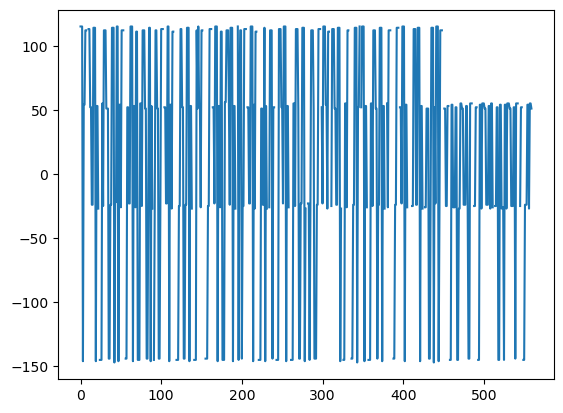

In [304]:
plt.plot(x_train[:, 6, 0, 3])

# Other experiments

In [135]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [136]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [137]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 37ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - 

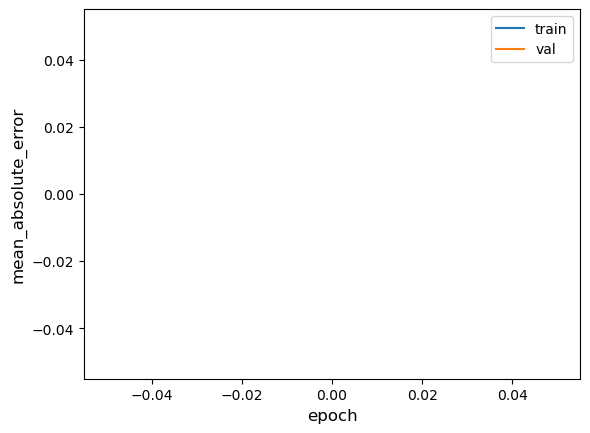

ValueError: Data cardinality is ambiguous:
  x sizes: 7557
  y sizes: 4899
Make sure all arrays contain the same number of samples.

In [138]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [139]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

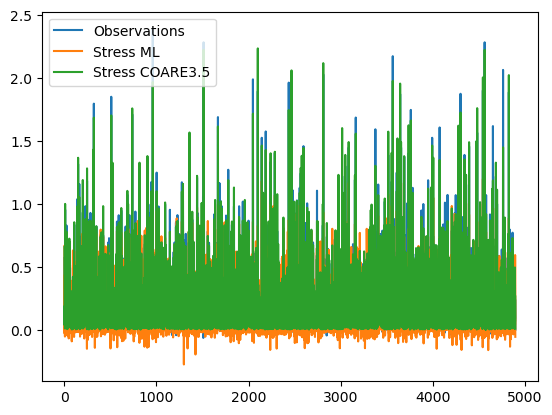

In [140]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [141]:
rmse(y_test.values, y_test_pred)

0.3340340170477901

In [142]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [143]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84175245],
       [0.84175245, 1.        ]])

In [144]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [145]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84175245],
       [0.84175245, 1.        ]])

In [146]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [147]:
y_test.values.shape

(4899,)

In [148]:
y_test_pred[:, 0].shape

(4899,)

In [149]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [150]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

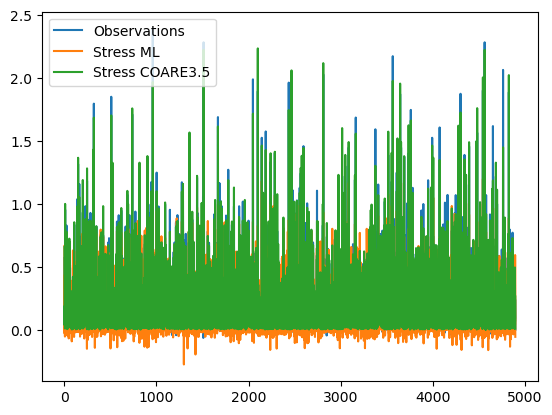

In [151]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

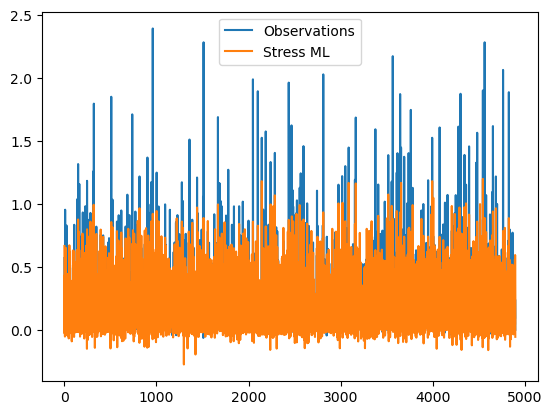

In [152]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [153]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [154]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3340340170477901

Text(0, 0.5, 'Stress ML [N/m²]')

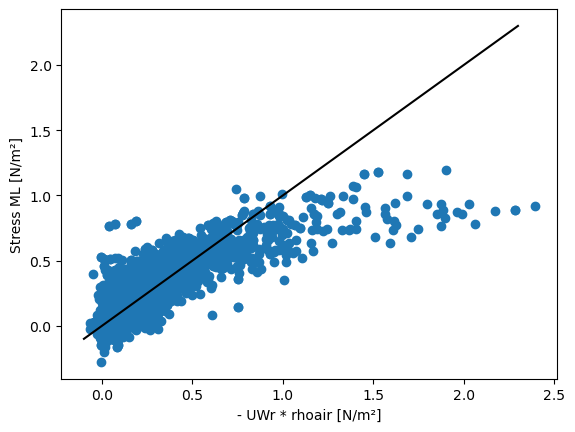

In [155]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [156]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [157]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [158]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.3269 - mean_absolute_error: 0.9099 - val_loss: 0.7320 - val_mean_absolute_error: 0.6459
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9012 - mean_absolute_error: 0.7045 - val_loss: 0.4701 - val_mean_absolute_error: 0.4576
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5724 - mean_absolute_error: 0.5709 - val_loss: 0.3433 - val_mean_absolute_error: 0.4167
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7202 - mean_absolute_error: 0.5951 - val_loss: 0.3166 - val_mean_absolute_error: 0.4019
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5256 - mean_absolute_error: 0.5145 - val_loss: 0.3029 - val_mean_absolute_error: 0.3930
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4978 - mean_absolute_error: 0.4965 - val_loss: 0.3055 - val_mean_absolute_error: 0.3859
Epoch 7/500
25/25 [===

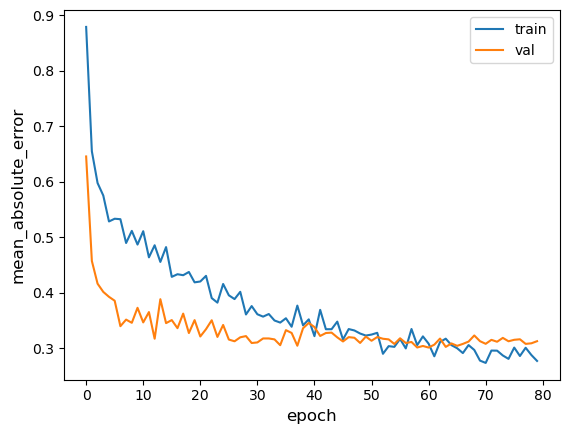

154/154 [==============================] - 0s 534us/step - loss: 0.3082 - mean_absolute_error: 0.3219
Test accuracy 0.3218744397163391
Test loss 0.30820751190185547


In [159]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [160]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

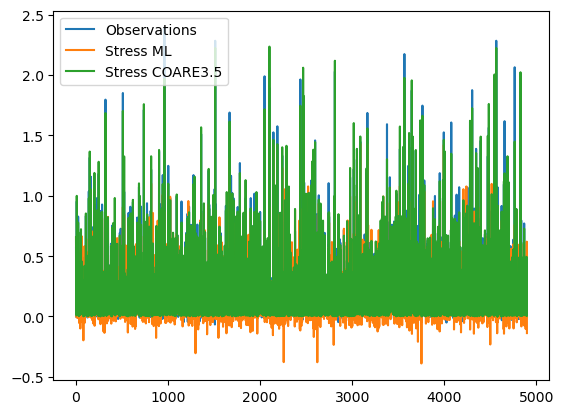

In [161]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [162]:
rmse(y_test.values, y_test_pred)

0.3304376681970454

In [163]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [164]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85157158],
       [0.85157158, 1.        ]])

In [165]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [166]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85157158],
       [0.85157158, 1.        ]])

In [167]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [168]:
y_test.values.shape

(4899,)

In [169]:
y_test_pred[:, 0].shape

(4899,)

In [170]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [171]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

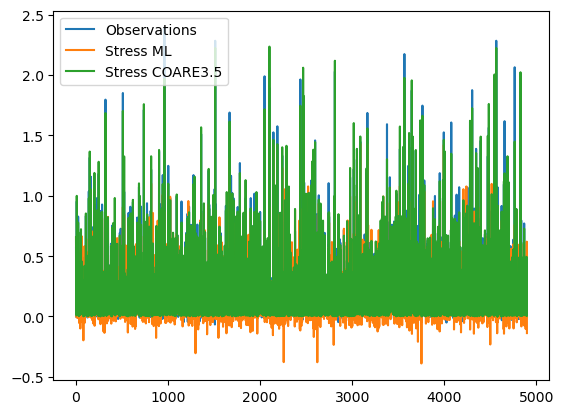

In [172]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

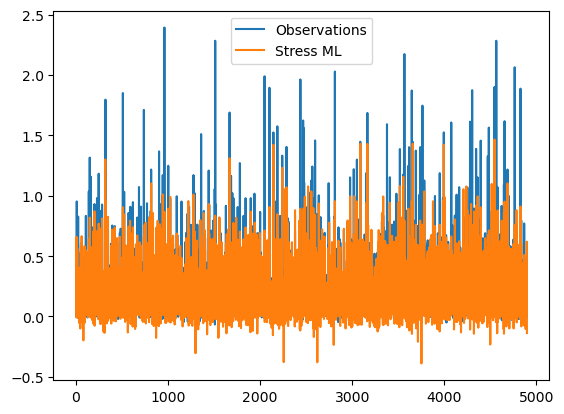

In [173]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [174]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [175]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3304376681970454

Text(0, 0.5, 'Stress ML [N/m²]')

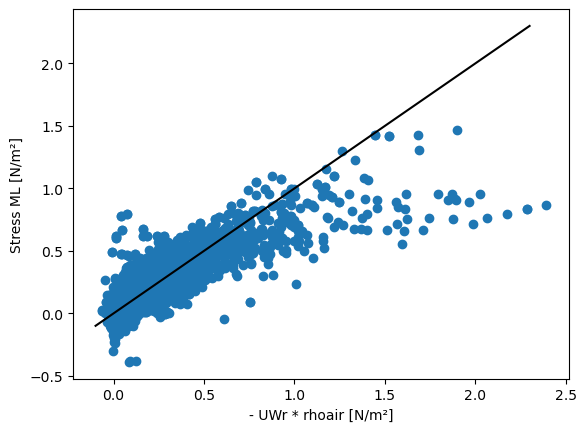

In [176]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [177]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [178]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [179]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.6579 - mean_absolute_error: 0.9524 - val_loss: 0.6119 - val_mean_absolute_error: 0.6189
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7714 - mean_absolute_error: 0.5919 - val_loss: 0.5069 - val_mean_absolute_error: 0.5509
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7738 - mean_absolute_error: 0.6112 - val_loss: 0.5073 - val_mean_absolute_error: 0.5582
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6073 - mean_absolute_error: 0.5351 - val_loss: 0.3956 - val_mean_absolute_error: 0.4784
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5335 - mean_absolute_error: 0.5199 - val_loss: 0.3339 - val_mean_absolute_error: 0.4224
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4636 - mean_absolute_error: 0.4931 - val_loss: 0.2931 - val_mean_absolute_error: 0.3974
Epoch 7/500
25/25 [===

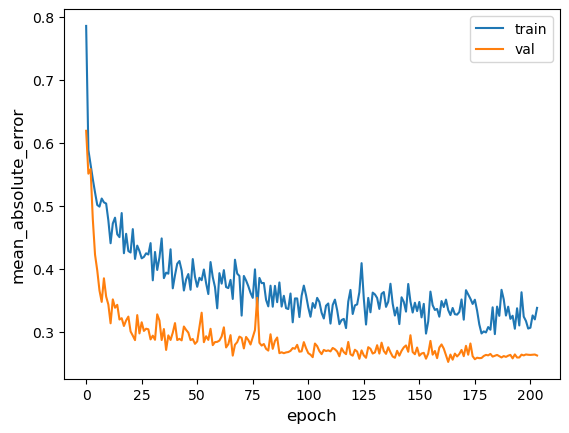

154/154 [==============================] - 0s 548us/step - loss: 0.2586 - mean_absolute_error: 0.3042
Test accuracy 0.30417972803115845
Test loss 0.2586073577404022


In [180]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [181]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

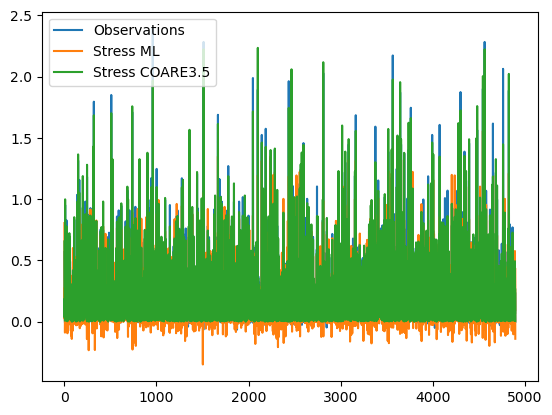

In [182]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [183]:
rmse(y_test.values, y_test_pred)

0.3324047961385538

In [184]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [185]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87721776],
       [0.87721776, 1.        ]])

In [186]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [187]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87721776],
       [0.87721776, 1.        ]])

In [188]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [189]:
y_test.values.shape

(4899,)

In [190]:
y_test_pred[:, 0].shape

(4899,)

In [191]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [192]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

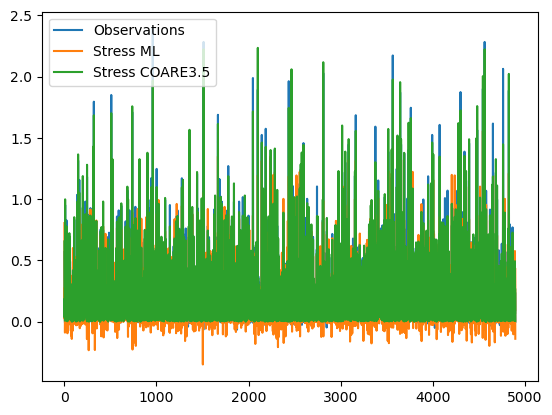

In [193]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

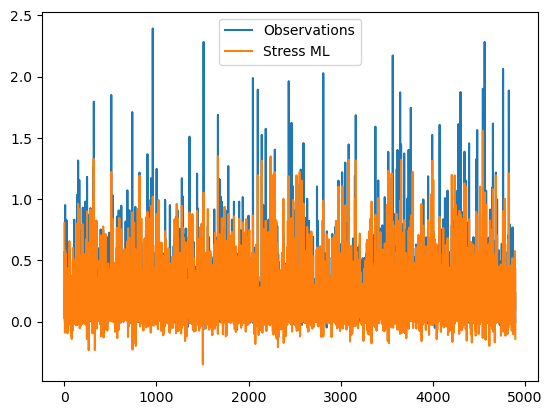

In [194]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [195]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [196]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3324047961385538

Text(0, 0.5, 'Stress ML [N/m²]')

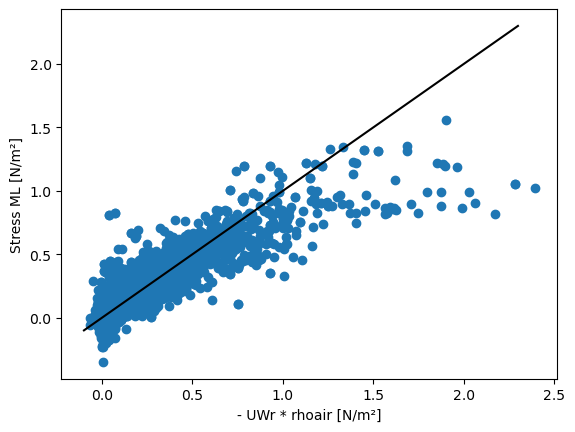

In [197]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [198]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [199]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [200]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.0831 - mean_absolute_error: 0.7721 - val_loss: 0.7667 - val_mean_absolute_error: 0.6635
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8542 - mean_absolute_error: 0.7016 - val_loss: 0.5587 - val_mean_absolute_error: 0.5254
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.4927 - mean_absolute_error: 0.5367 - val_loss: 0.4273 - val_mean_absolute_error: 0.4480
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6130 - mean_absolute_error: 0.5714 - val_loss: 0.3133 - val_mean_absolute_error: 0.3871
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5074 - mean_absolute_error: 0.5069 - val_loss: 0.3505 - val_mean_absolute_error: 0.4387
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5890 - mean_absolute_error: 0.5726 - val_loss: 0.3101 - val_mean_absolute_error: 0.4161
Epoch 7/500
25/25 [===

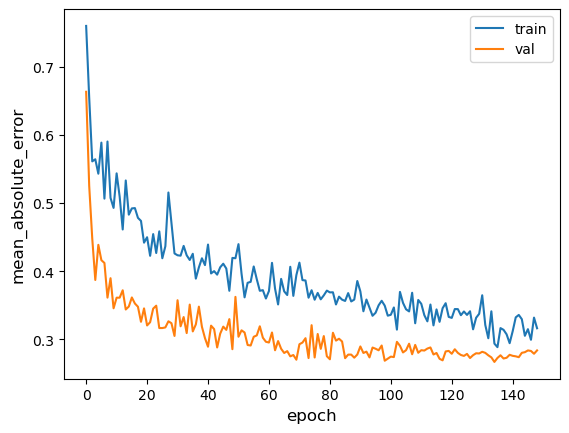

154/154 [==============================] - 0s 550us/step - loss: 0.2764 - mean_absolute_error: 0.3112
Test accuracy 0.3111555278301239
Test loss 0.27638232707977295


In [201]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [202]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

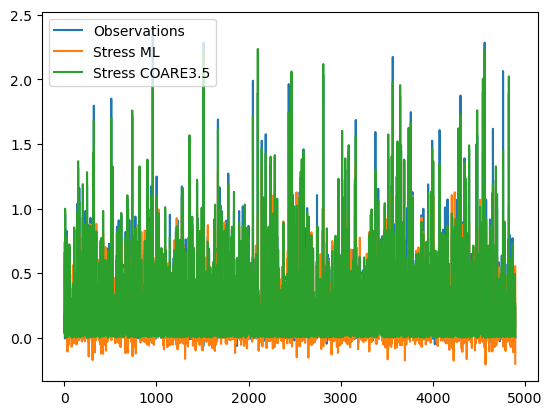

In [203]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [204]:
rmse(y_test.values, y_test_pred)

0.3296802650769641

In [205]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [206]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86812754],
       [0.86812754, 1.        ]])

In [207]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [208]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86812754],
       [0.86812754, 1.        ]])

In [209]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [210]:
y_test.values.shape

(4899,)

In [211]:
y_test_pred[:, 0].shape

(4899,)

In [212]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [213]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

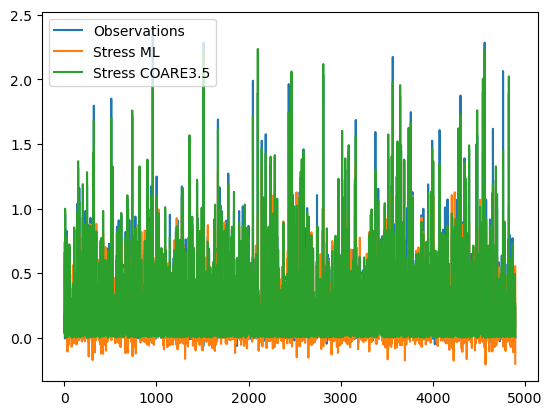

In [214]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

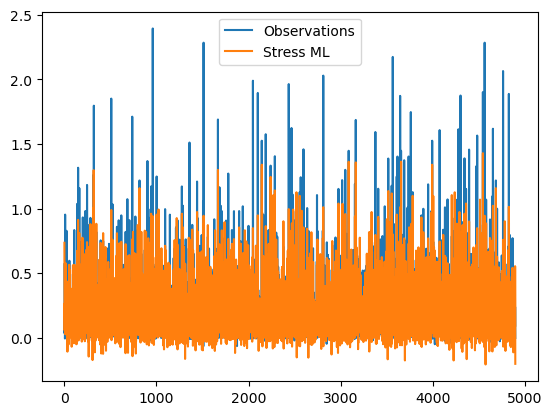

In [215]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [216]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [217]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3296802650769641

Text(0, 0.5, 'Stress ML [N/m²]')

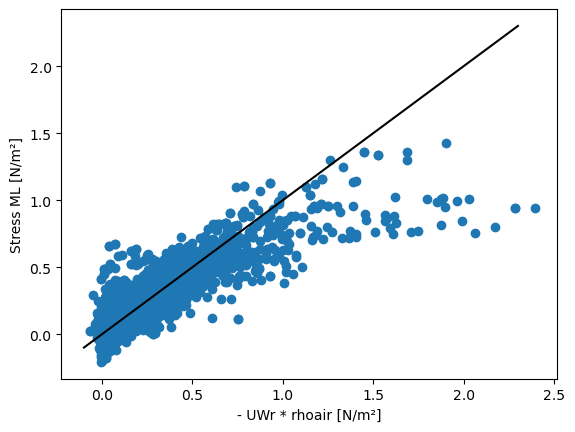

In [218]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [219]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [220]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [221]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7,11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.7834 - mean_absolute_error: 1.0392 - val_loss: 1.0781 - val_mean_absolute_error: 0.9255
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.1200 - mean_absolute_error: 0.8144 - val_loss: 0.8483 - val_mean_absolute_error: 0.8198
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 1.0226 - mean_absolute_error: 0.7628 - val_loss: 0.7028 - val_mean_absolute_error: 0.7409
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9323 - mean_absolute_error: 0.7333 - val_loss: 0.5044 - val_mean_absolute_error: 0.5992
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6982 - mean_absolute_error: 0.6263 - val_loss: 0.4206 - val_mean_absolute_error: 0.5370
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7269 - mean_absolute_error: 0.6605 - val_loss: 0.3437 - val_mean_absolute_error: 0.4703
Epoch 7/500
25/25 [===

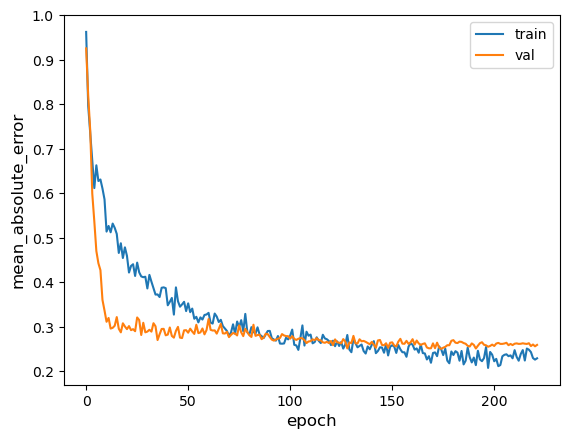

154/154 [==============================] - 0s 532us/step - loss: 0.2309 - mean_absolute_error: 0.2868
Test accuracy 0.28682374954223633
Test loss 0.23090124130249023


In [222]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [223]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

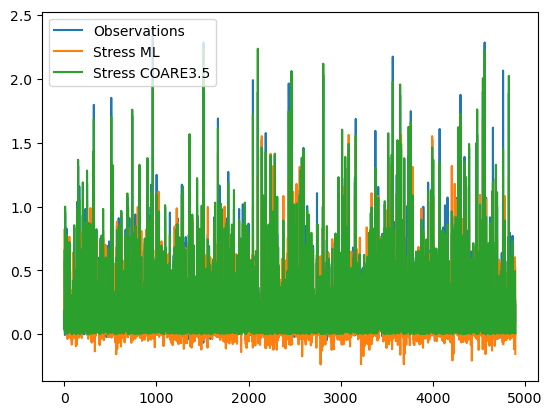

In [224]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [225]:
rmse(y_test.values, y_test_pred)

0.33960079557896683

In [226]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [227]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89089685],
       [0.89089685, 1.        ]])

In [228]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [229]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89089685],
       [0.89089685, 1.        ]])

In [230]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [231]:
y_test.values.shape

(4899,)

In [232]:
y_test_pred[:, 0].shape

(4899,)

In [233]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [234]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

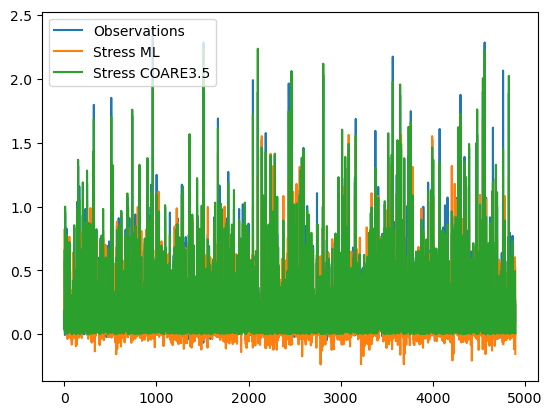

In [235]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

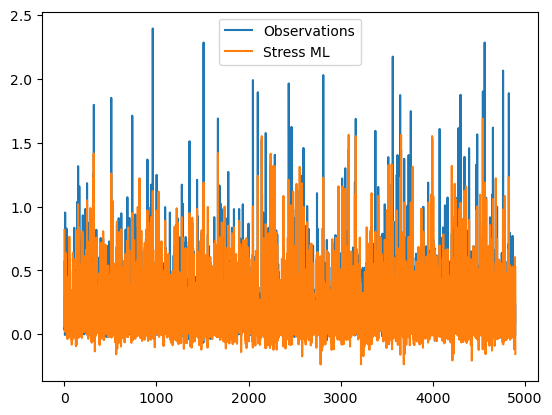

In [236]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [237]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [238]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.33960079557896683

Text(0, 0.5, 'Stress ML [N/m²]')

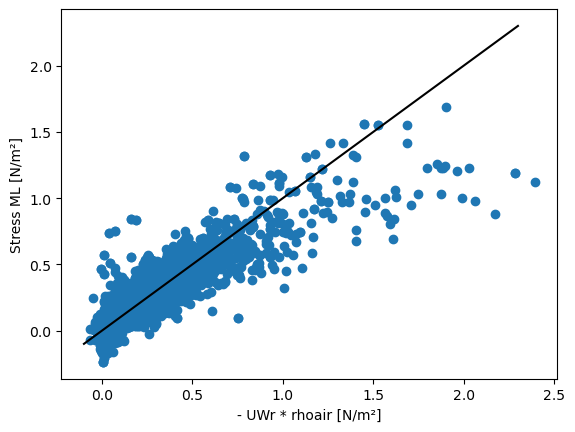

In [239]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [240]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [241]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [242]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.7414 - mean_absolute_error: 0.9755 - val_loss: 1.2825 - val_mean_absolute_error: 1.0131
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9724 - mean_absolute_error: 0.7277 - val_loss: 0.8648 - val_mean_absolute_error: 0.8146
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7750 - mean_absolute_error: 0.6684 - val_loss: 0.6087 - val_mean_absolute_error: 0.6689
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8838 - mean_absolute_error: 0.6573 - val_loss: 0.4490 - val_mean_absolute_error: 0.5527
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6026 - mean_absolute_error: 0.5630 - val_loss: 0.3700 - val_mean_absolute_error: 0.4880
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6987 - mean_absolute_error: 0.5990 - val_loss: 0.3293 - val_mean_absolute_error: 0.4521
Epoch 7/500
25/25 [===

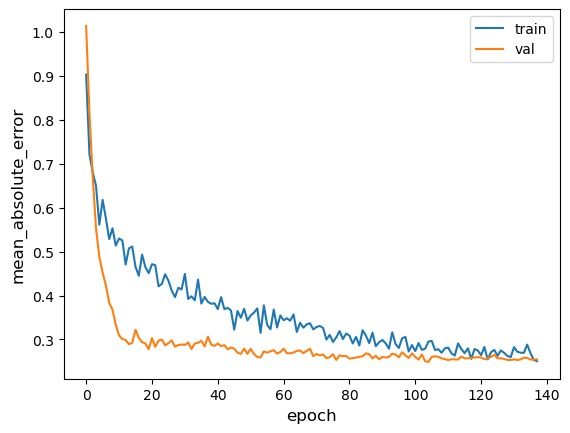

154/154 [==============================] - 0s 521us/step - loss: 5985.3799 - mean_absolute_error: 60.3060
Test accuracy 60.306007385253906
Test loss 5985.3798828125


In [243]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [244]:
y_test_pred = multi_dense_model.predict(x_test)

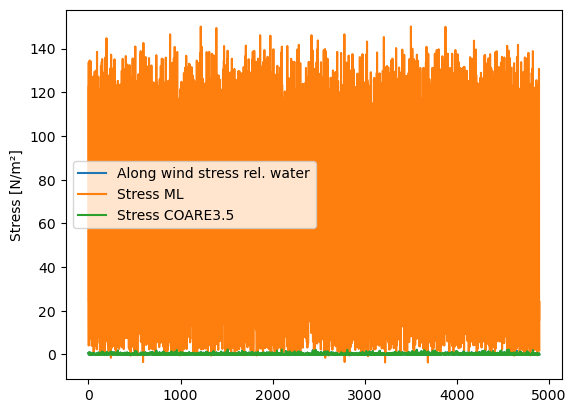

In [245]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [246]:
rmse(y_test.values, y_test_pred)

77.38490545642273

In [247]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [248]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.12321317],
       [0.12321317, 1.        ]])

In [249]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [250]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [251]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [252]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 7ms/step - loss: 2.5249 - mean_absolute_error: 1.1966 - val_loss: 0.6086 - val_mean_absolute_error: 0.5975
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.0926 - mean_absolute_error: 0.8158 - val_loss: 0.3904 - val_mean_absolute_error: 0.4685
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8850 - mean_absolute_error: 0.7191 - val_loss: 0.3511 - val_mean_absolute_error: 0.4457
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9044 - mean_absolute_error: 0.7228 - val_loss: 0.3611 - val_mean_absolute_error: 0.4689
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5922 - mean_absolute_error: 0.5949 - val_loss: 0.2538 - val_mean_absolute_error: 0.3903
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7851 - mean_absolute_error: 0.6770 - val_loss: 0.2532 - val_mean_absolute_error: 0.3951
Epoch 7/500
25/25 [===

In [253]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [254]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [255]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 2.5665 - mean_absolute_error: 1.2118 - val_loss: 0.5792 - val_mean_absolute_error: 0.5720
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.2798 - mean_absolute_error: 0.7998 - val_loss: 0.5004 - val_mean_absolute_error: 0.5450
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 1.2675 - mean_absolute_error: 0.8382 - val_loss: 0.4641 - val_mean_absolute_error: 0.5352
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 1.1799 - mean_absolute_error: 0.8087 - val_loss: 0.3672 - val_mean_absolute_error: 0.4412
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 1.0983 - mean_absolute_error: 0.7527 - val_loss: 0.3150 - val_mean_absolute_error: 0.4153
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8702 - mean_absolute_error: 0.7207 - val_loss: 0.3262 - val_mean_absolute_error: 0.4160
Epoch 7/500
25/25 [===

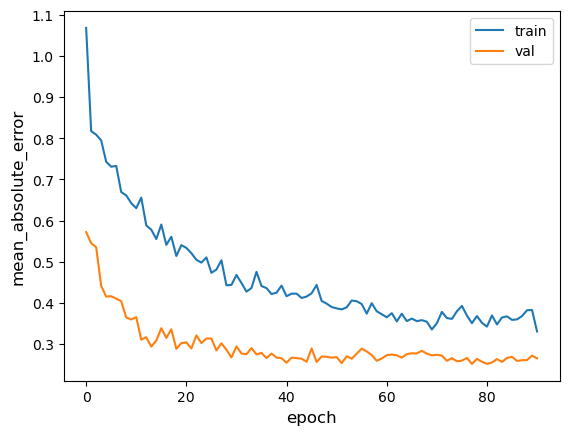

154/154 [==============================] - 0s 663us/step - loss: 0.2474 - mean_absolute_error: 0.2864
Test accuracy 0.2864055335521698
Test loss 0.247441828250885


In [256]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [257]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

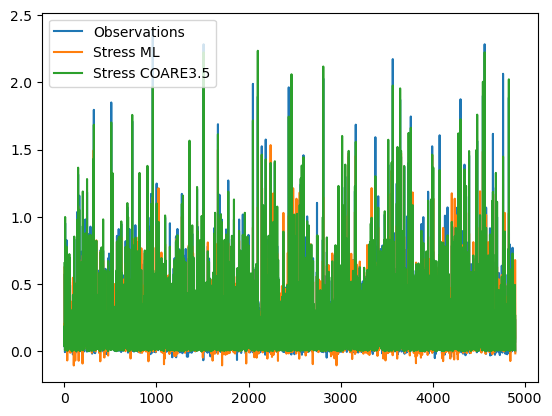

In [258]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [259]:
rmse(y_test.values, y_test_pred)

0.32379753326307076

In [260]:
rmse(y_test.values, c_test.values)

0.05126996932539711

In [261]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88816756],
       [0.88816756, 1.        ]])

In [262]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

## Correlation

In [263]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88816756],
       [0.88816756, 1.        ]])

In [264]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [265]:
y_test.values.shape

(4899,)

In [266]:
y_test_pred[:, 0].shape

(4899,)

In [267]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [268]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([ 0.56877004,  0.11939243,  0.03501469, ...,  0.2386598 ,
        0.04570196, -0.00169203])

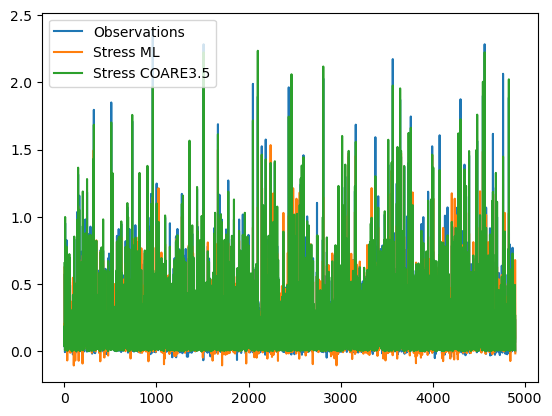

In [269]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

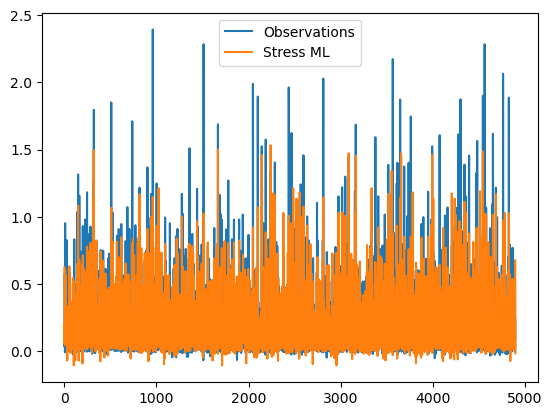

In [270]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [271]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97971391],
       [0.97971391, 1.        ]])

In [272]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.32379753326307076

Text(0, 0.5, 'Stress ML [N/m²]')

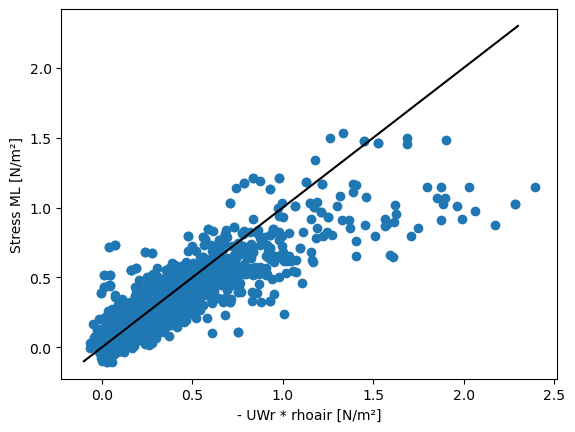

In [273]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [274]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [275]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [276]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_11/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,32].

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
y_test.values.shape

In [ ]:
y_test_pred[:, 0].shape

In [ ]:
(y_test_pred < 2)

In [ ]:
y_test.values[(y_test_pred[:, 0] < 2 )]

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [ ]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [ ]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [ ]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [ ]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

## Correlation

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [ ]:
y_test.values.shape

In [ ]:
y_test_pred[:, 0].shape

In [ ]:
(y_test_pred < 2)

In [ ]:
y_test.values[(y_test_pred[:, 0] < 2 )]

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

In [ ]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [ ]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

In [ ]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

In [ ]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 